# Exercise 1: Sparse Image Representation with Wavelets

In [1]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float

In [2]:
# Load image
image = img_as_float(io.imread('axial.png'))

## a) Pixels with zero intensity

In [3]:
# the quantity of pixels with zero intensity
zero_values = np.count_nonzero(image==0)
print(zero_values)

34390


In [4]:
# the fraction of pixels with zero intensity
print(zero_values/image.size)

0.524749755859375


52% of the pixels are of zero intensity, which is a little more than half of the complete image.

## b) Different coefficient percentages

In [5]:
# Compute DWT
wavelet = 'db1'
levels = 1
coeffs = pywt.wavedec2(image, wavelet, level=levels)
# coeffs[0] = approximation at the last level
# coeffs[1:] = detail coefficients at each level (H, V, D)

Original keeping 20% of the coefficients

In [6]:
# Flatten coefficients and threshold
coeffs_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
abs_coeffs = np.abs(coeffs_arr)

# Keep top X% largest coefficients
percent_to_keep = 0.2
threshold = np.percentile(abs_coeffs, (1 - percent_to_keep) * 100)

print(threshold)

coeffs_arr[np.abs(coeffs_arr) < threshold] = 0

0.03921568627450983


In [7]:
# Reconstruct image from thresholded coefficients
coeffs_thresholded = pywt.array_to_coeffs(coeffs_arr, coeff_slices, output_format='wavedec2')
reconstructed = pywt.waverec2(coeffs_thresholded, wavelet)
reconstructed = np.clip(reconstructed, 0, 1)

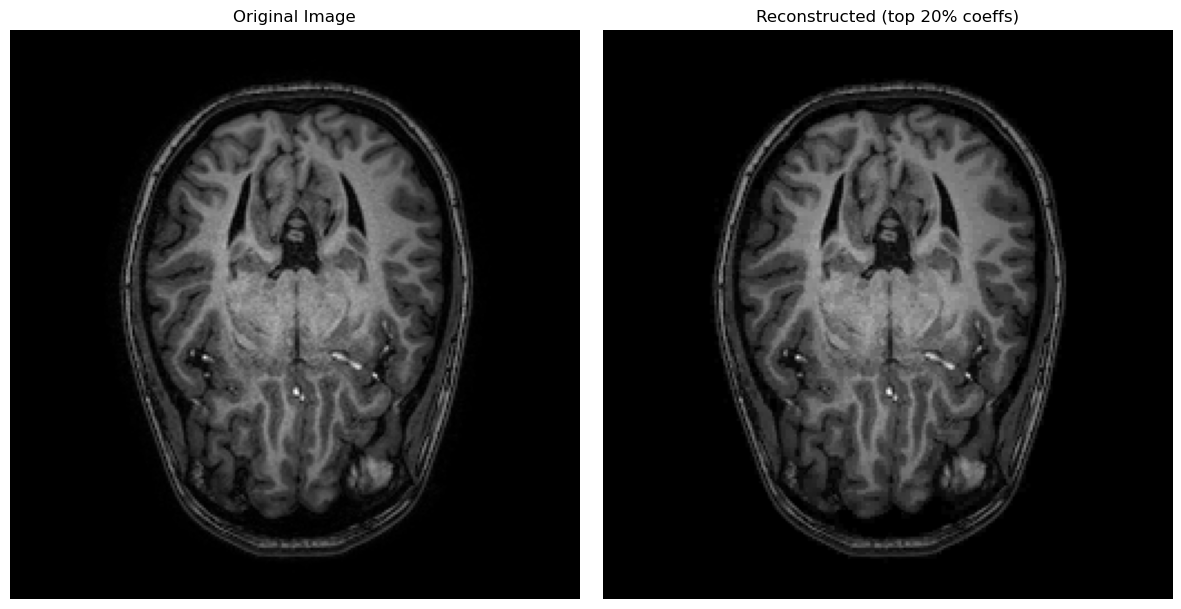

In [8]:
# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed, cmap='gray')
plt.title(f'Reconstructed (top {percent_to_keep*100:.0f}% coeffs)')
plt.axis('off')
plt.tight_layout()
plt.show()

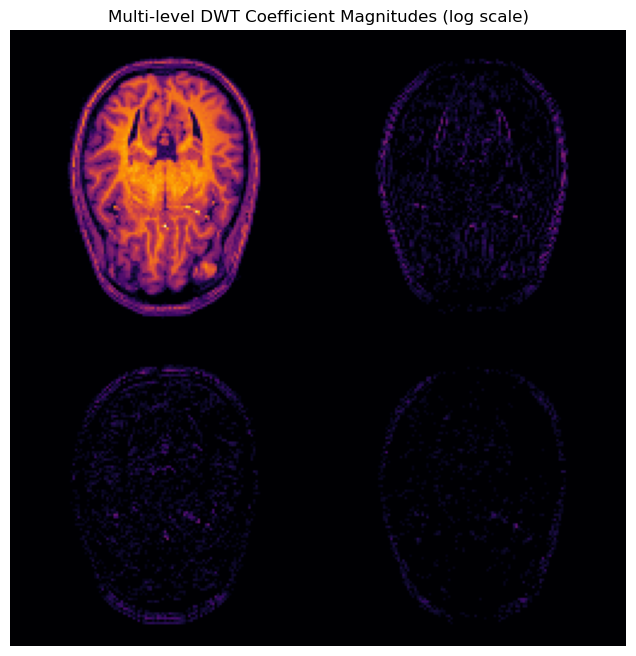

In [9]:
# Visualize coefficient magnitudes
plt.figure(figsize=(8, 8))
plt.imshow(np.log1p(np.abs(coeffs_arr)), cmap='inferno')
plt.title('Multi-level DWT Coefficient Magnitudes (log scale)')
plt.axis('off')
plt.show()

Slight differences, keeping 10% of the coefficients

In [10]:
# Flatten coefficients and threshold
coeffs_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
abs_coeffs = np.abs(coeffs_arr)

# Keep top X% largest coefficients
percent_to_keep = 0.1
threshold = np.percentile(abs_coeffs, (1 - percent_to_keep) * 100)

print(threshold)

coeffs_arr[np.abs(coeffs_arr) < threshold] = 0

# Reconstruct image from thresholded coefficients
coeffs_thresholded = pywt.array_to_coeffs(coeffs_arr, coeff_slices, output_format='wavedec2')
reconstructed = pywt.waverec2(coeffs_thresholded, wavelet)
reconstructed = np.clip(reconstructed, 0, 1)

0.15294117647058825


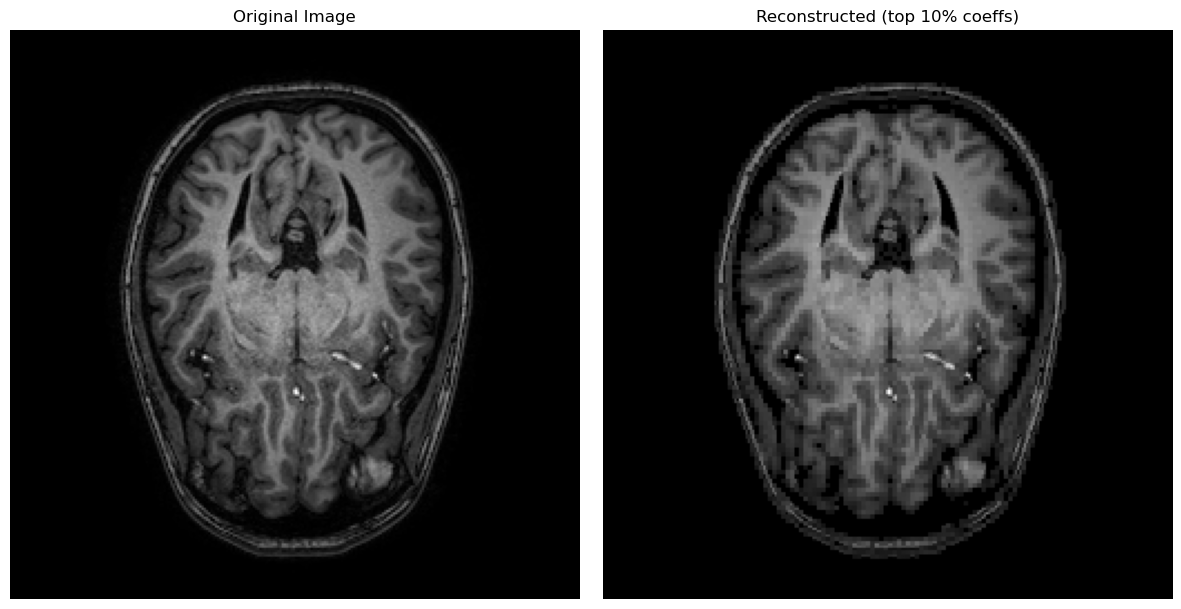

In [11]:
# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed, cmap='gray')
plt.title(f'Reconstructed (top {percent_to_keep*100:.0f}% coeffs)')
plt.axis('off')
plt.tight_layout()
plt.show()

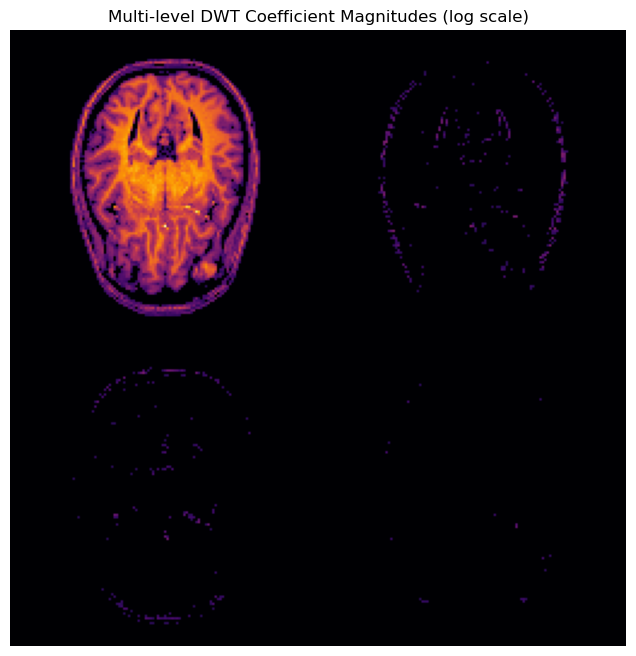

In [12]:
# Visualize coefficient magnitudes
plt.figure(figsize=(8, 8))
plt.imshow(np.log1p(np.abs(coeffs_arr)), cmap='inferno')
plt.title('Multi-level DWT Coefficient Magnitudes (log scale)')
plt.axis('off')
plt.show()

Strong differences, keeping 1% of the coefficients

In [13]:
# Flatten coefficients and threshold
coeffs_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
abs_coeffs = np.abs(coeffs_arr)

# Keep top X% largest coefficients
percent_to_keep = 0.01
threshold = np.percentile(abs_coeffs, (1 - percent_to_keep) * 100)

print(threshold)

coeffs_arr[np.abs(coeffs_arr) < threshold] = 0

# Reconstruct image from thresholded coefficients
coeffs_thresholded = pywt.array_to_coeffs(coeffs_arr, coeff_slices, output_format='wavedec2')
reconstructed = pywt.waverec2(coeffs_thresholded, wavelet)
reconstructed = np.clip(reconstructed, 0, 1)

0.9803921568627453


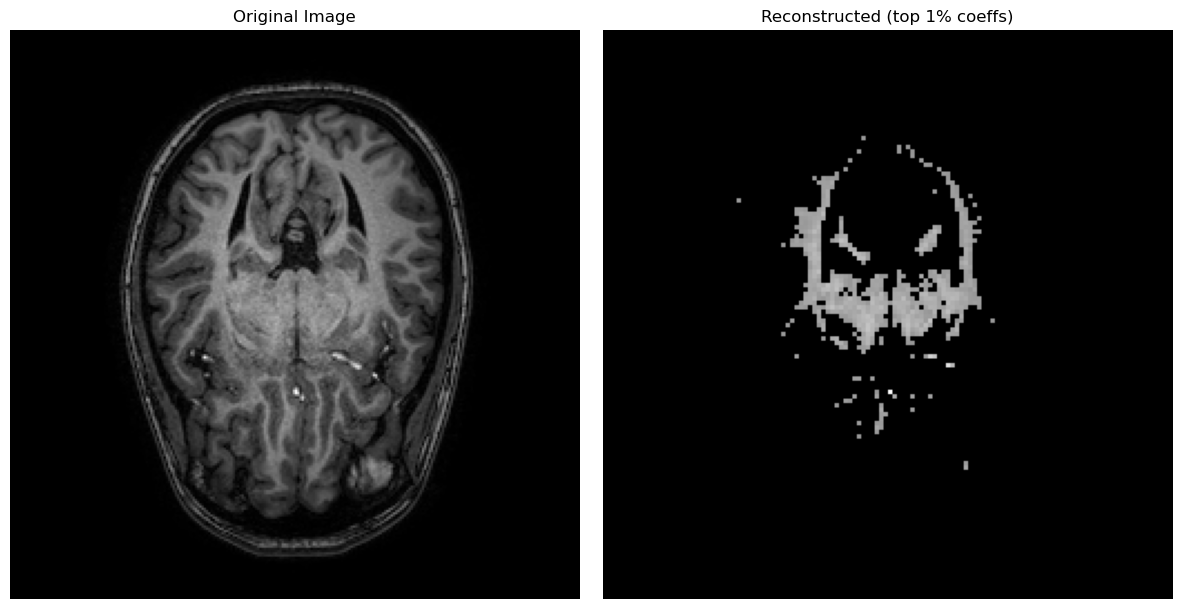

In [14]:
# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed, cmap='gray')
plt.title(f'Reconstructed (top {percent_to_keep*100:.0f}% coeffs)')
plt.axis('off')
plt.tight_layout()
plt.show()

In [15]:
# Visualize coefficient magnitudes
plt.figure(figsize=(8, 8))
plt.imshow(np.log1p(np.abs(coeffs_arr)), cmap='inferno')
plt.title('Multi-level DWT Coefficient Magnitudes (log scale)')
plt.axis('off')
plt.show()

We change the original 20% threshold to 10% (subtle differences) and to 1% (strong differences). The 10% reconstructed image is similar to the first one, showing the same structure, but a little more pixelated, loosing some texture, but keeping the structure as is. This result is due to the fact that we still keep a higher amount of coefficients with enough information (removed some details).

Comparatively, the 1% reconstruction is much worse, as we removed the vast majority of coefficients, including the ones which represent the brain structure, only keeping the sharper difference areas. The image represented is pixelated and not very much of the brain is clear enough.

## c) Three levels

In [16]:
# Compute DWT
wavelet = 'db1'
# change to 3 levels
levels = 3
coeffs = pywt.wavedec2(image, wavelet, level=levels)
# coeffs[0] = approximation at the last level
# coeffs[1:] = detail coefficients at each level (H, V, D)

Original keeping 20% of the coefficients

In [17]:
# Flatten coefficients and threshold
coeffs_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
abs_coeffs = np.abs(coeffs_arr)

# Keep top X% largest coefficients
percent_to_keep = 0.2
threshold = np.percentile(abs_coeffs, (1 - percent_to_keep) * 100)

print(threshold)

coeffs_arr[np.abs(coeffs_arr) < threshold] = 0

0.033333333333333326


In [18]:
# Reconstruct image from thresholded coefficients
coeffs_thresholded = pywt.array_to_coeffs(coeffs_arr, coeff_slices, output_format='wavedec2')
reconstructed = pywt.waverec2(coeffs_thresholded, wavelet)
reconstructed = np.clip(reconstructed, 0, 1)

In [19]:
# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed, cmap='gray')
plt.title(f'Reconstructed (top {percent_to_keep*100:.0f}% coeffs)')
plt.axis('off')
plt.tight_layout()
plt.show()

In [20]:
# Visualize coefficient magnitudes
plt.figure(figsize=(8, 8))
plt.imshow(np.log1p(np.abs(coeffs_arr)), cmap='inferno')
plt.title('Multi-level DWT Coefficient Magnitudes (log scale)')
plt.axis('off')
plt.show()

Slight differences, keeping 10% of the coefficients

In [21]:
# Flatten coefficients and threshold
coeffs_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
abs_coeffs = np.abs(coeffs_arr)

# Keep top X% largest coefficients
percent_to_keep = 0.1
threshold = np.percentile(abs_coeffs, (1 - percent_to_keep) * 100)

print(threshold)

coeffs_arr[np.abs(coeffs_arr) < threshold] = 0

# Reconstruct image from thresholded coefficients
coeffs_thresholded = pywt.array_to_coeffs(coeffs_arr, coeff_slices, output_format='wavedec2')
reconstructed = pywt.waverec2(coeffs_thresholded, wavelet)
reconstructed = np.clip(reconstructed, 0, 1)

0.07450980392156861


In [22]:
# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed, cmap='gray')
plt.title(f'Reconstructed (top {percent_to_keep*100:.0f}% coeffs)')
plt.axis('off')
plt.tight_layout()
plt.show()

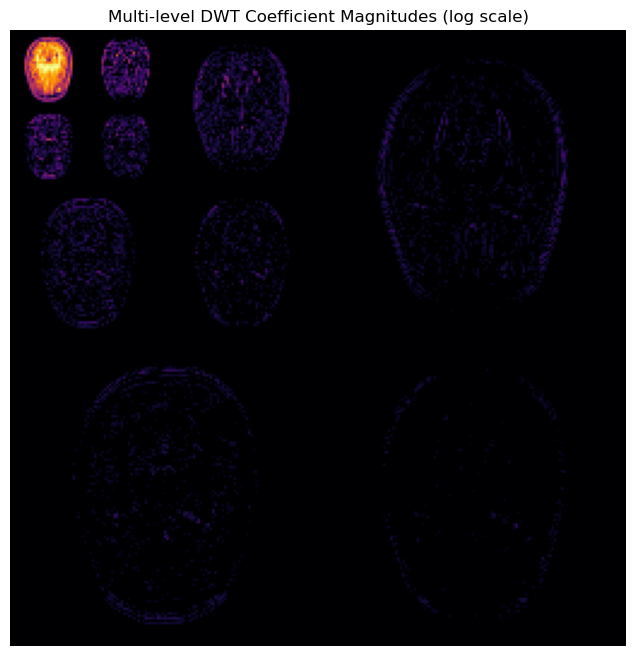

In [23]:
# Visualize coefficient magnitudes
plt.figure(figsize=(8, 8))
plt.imshow(np.log1p(np.abs(coeffs_arr)), cmap='inferno')
plt.title('Multi-level DWT Coefficient Magnitudes (log scale)')
plt.axis('off')
plt.show()

Strong differences, keeping 1% of the coefficients

In [24]:
# Flatten coefficients and threshold
coeffs_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
abs_coeffs = np.abs(coeffs_arr)

# Keep top X% largest coefficients
percent_to_keep = 0.01
threshold = np.percentile(abs_coeffs, (1 - percent_to_keep) * 100)

print(threshold)

coeffs_arr[np.abs(coeffs_arr) < threshold] = 0

# Reconstruct image from thresholded coefficients
coeffs_thresholded = pywt.array_to_coeffs(coeffs_arr, coeff_slices, output_format='wavedec2')
reconstructed = pywt.waverec2(coeffs_thresholded, wavelet)
reconstructed = np.clip(reconstructed, 0, 1)

0.42843137254901975


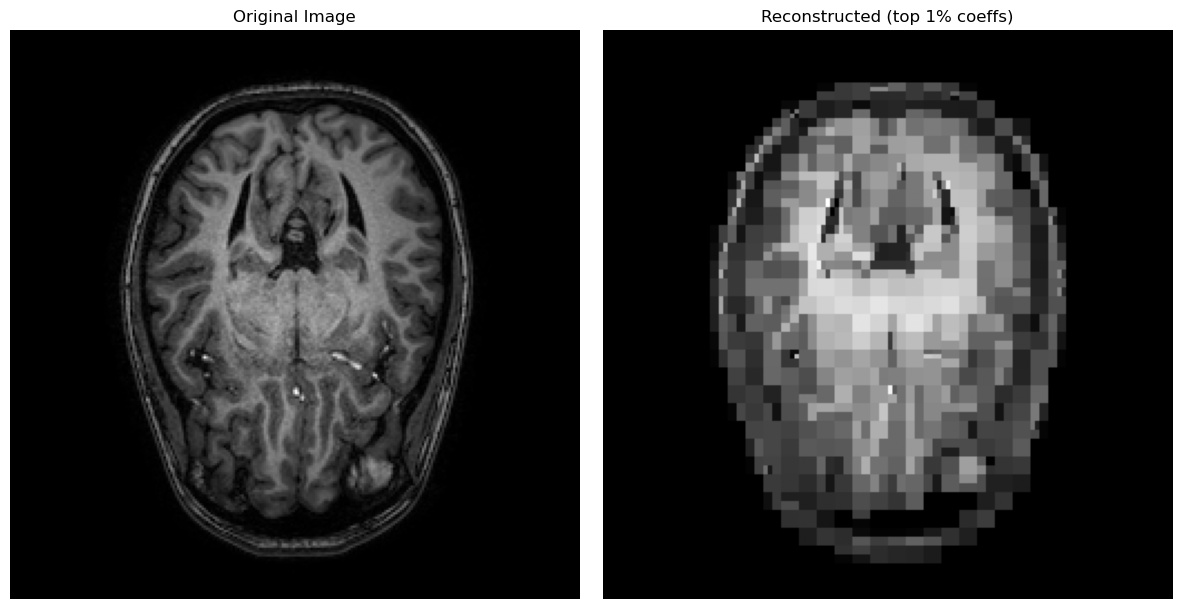

In [25]:
# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed, cmap='gray')
plt.title(f'Reconstructed (top {percent_to_keep*100:.0f}% coeffs)')
plt.axis('off')
plt.tight_layout()
plt.show()

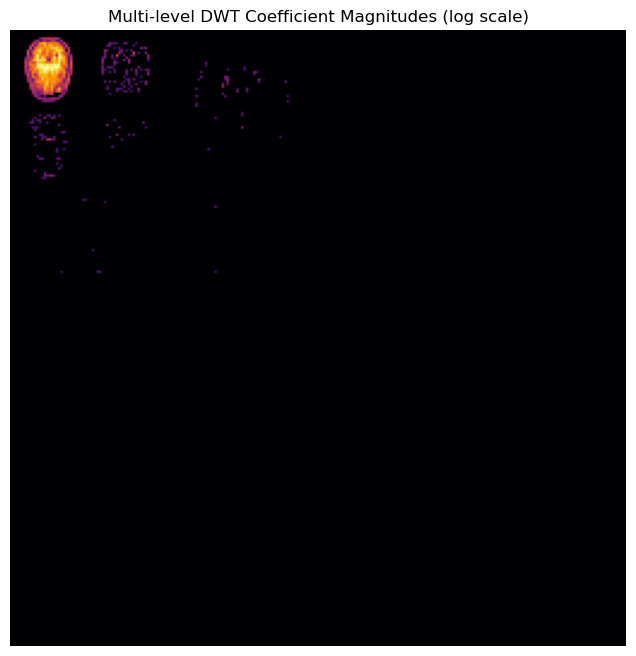

In [26]:
# Visualize coefficient magnitudes
plt.figure(figsize=(8, 8))
plt.imshow(np.log1p(np.abs(coeffs_arr)), cmap='inferno')
plt.title('Multi-level DWT Coefficient Magnitudes (log scale)')
plt.axis('off')
plt.show()

Now that we have 3 levels (with the same thresholds as before) we can see a big difference. The reconstructions with 20% and 10% look nearly identical to the original. While the 1% case is much better than the previous case, as the reconstruction now resembles the original image, although very pixelated, but with some clear details present in the original that were not there in the 1-level case.

This result are due to having multiple levels, which allow us to preserve more structure in the coefficients, allowing for better details and shapes within the image to be present in the reconstruction.

# Exercise 2: Trainable Parameters in Neural Networks

a) AUTOMAP starts with 2 fully connected layers, first one maps $2n^2$ inputs to $n^2$ neurons, and the second layer maps those to another $n^2$ neurons. The quantity of trainable parameters within those 2 layers is equal to (considering the bias terms):

$$parameters = (2n^2+ 1 )n^2 + (n^2 + 1)n^2$$

This is because we need to connect all input neurons and bias to the next layer, so there will be a weight for each of those connections. And the same applies to the second layer. With $n = 128$ we get a quantity of 805339136 (805 million) trainable parameters for the first 2 fully connected layers.

In [27]:
n = 128
param = (2*n**2 + 1)*n**2 + (n**2 + 1)*n**2
print(param)

805339136


b) After AUTOMAP reshapes the output of the second fully connected layer into $n \times n$ it continues the process with convolutional layers, the first one is a 5x5 convolution layer with 64 output channels, the second is equally a 5x5 convolution with 64 output channels, ending with a 7x7 transposed convolution (deconvolution) that generates a single output image. The parameters from a (de)convolution layer can be computed as follows:

$$parameters = input\_channels \times convolution\_size \times output\_channels + output\_channels$$
The added $output\_channels$ is due to the need to add the bias for each output channel. With the values given before and adding them all together, we end with the following equation:
$$parameters = (1\times5\times5\times64 + 64) + (64\times5\times5\times64 + 64) + (64\times7\times7\times1 + 1)$$
$$parameters = 107265$$
Within the convolutional layers we get 107265 (107 thousand) of trainable parameters, much less as compared to the quantity for the fully connected part of AUTOMAP.

In [28]:
param2 = 1*5*5*64 + 64 + 64*5*5*64 + 64 + 64*7*7*1 + 1
print(param2)

107265


In [29]:
print(param+param2)

805446401


In total, AUTOMAP has 805446401 (805 million) trainable parameters, the vast majority coming from the fully connected layers.

c) With image-to-image model we have an initial 9x9 convolution with an output of 64 channels, connected to a 5x5 convolution layer with 32 output channels, ending with a single output channel from another 5x5 convolution. We already know how to compute this quantity, and as it doesn't have fully connected layers, it already seems like it will reduce the AUTOMAP quantity by a lot.
$$parameters = (1\times9\times9\times64+64) + (64\times5\times5\times32+32) + (32\times5\times5\times1+1)$$
$$parameters = 57281$$
This model gives a much reduced quantity of parameters, only 57281 to train.

In [30]:
param3 = 1*9*9*64 + 64 + 64*5*5*32 + 32 + 32*5*5*1 + 1
print(param3)

57281


# Exercise 4
### a)

In [31]:
import numpy as np
from scipy.ndimage import affine_transform
from PIL import Image
import matplotlib.pyplot as plt

def apply_2d_transform(img, vector):
    """
    I assume the 6d vector is defined in x,y coordinates and I saw that Scipy needs row,col order.
    So I had to make some changes in the affine matrix definition.
    """
    a, b, c, d, tx, ty = map(float, vector)
    #normal forward transfor,
    matrix = np.array([
        [a, b, tx],
        [c, d, ty],
        [0, 0,  1]
    ])
    # this is where I did the reordering for row,col layout instead of x,y
    matrix_rc = np.array([
        [ matrix[1,1], matrix[1,0], matrix[1,2] ],   # row' = y'
        [ matrix[0,1], matrix[0,0], matrix[0,2] ],   # col' = x'
        [ 0,          0,          1        ]
    ])
    matrix_inv = np.linalg.inv(matrix_rc) #had to invert per scipy documentation 
    M = matrix_inv[:2, :2]
    offset = matrix_inv[:2, 2]
    return affine_transform(img,M,offset=offset,output_shape=img.shape)

p = (1, 0, 0, 1, 50, 0)  
img = np.array(Image.open("axial.png"))
if img.ndim == 3:
    img = img[..., 0]
warped = apply_2d_transform(img, p)
# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(warped, cmap='gray')
plt.title(f'Moved 50 pixels to the right')
plt.tight_layout()
plt.show()

### b)

In [32]:
def l2_cost(fixed, moving):
    fixed_f  = fixed.astype(np.float32)
    moving_f = moving.astype(np.float32)
    return np.mean((fixed_f - moving_f) ** 2)

def rotation_vector(angle_deg, cx, cy): # this gives the 6d vector needed for the transform function
    theta = np.deg2rad(angle_deg)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    a = cos_t
    b = -sin_t
    c = sin_t
    d = cos_t
    tx = cx - (cos_t * cx + b * cy)  
    ty = cy - (c * cx + cos_t * cy)
    return (a, b, c, d, tx, ty)

img = np.array(Image.open("axial.png"))
if img.ndim == 3:
    img = img[..., 0]
img = img.astype(np.float32)
H, W = img.shape
cx, cy = (W - 1) / 2.0, (H - 1) / 2.0 #to rotate around center (it wasn't defined around what to rotate so we just did center)
#translation
dx_values = np.arange(-250, 251, 5)  
cost_shift = []
for dx in dx_values: 
    p_shift = (1, 0, 0, 1, dx, 0) 
    moved = apply_2d_transform(img, p_shift)
    cost_shift.append(l2_cost(img, moved))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(dx_values, cost_shift, marker='o')
plt.title("L2 cost vs horizontal shift")
plt.xlabel("Shift to the right (pixels)")
plt.ylabel("L2 cost")
plt.grid(True)
#rotation
angle_values = np.arange(0, 361, 5)  
cost_rot = []
for ang in angle_values:
    p_rot = rotation_vector(ang, cx, cy)
    rotated = apply_2d_transform(img, p_rot)
    cost_rot.append(l2_cost(img, rotated))
plt.subplot(1, 2, 2)
plt.plot(angle_values, cost_rot, marker='o')
plt.title("L2 cost vs rotation")
plt.xlabel("Rotation (degrees)")
plt.ylabel("L2 cost")
plt.grid(True)
plt.show()

### c)
The registration didn't fully succeed.Restarting the algorithm on the results from the first run did improve the results. However, we still wouldn't say registration fully succeded.

L2 after 1st run: 761.0087
L2 after restart: 568.2841


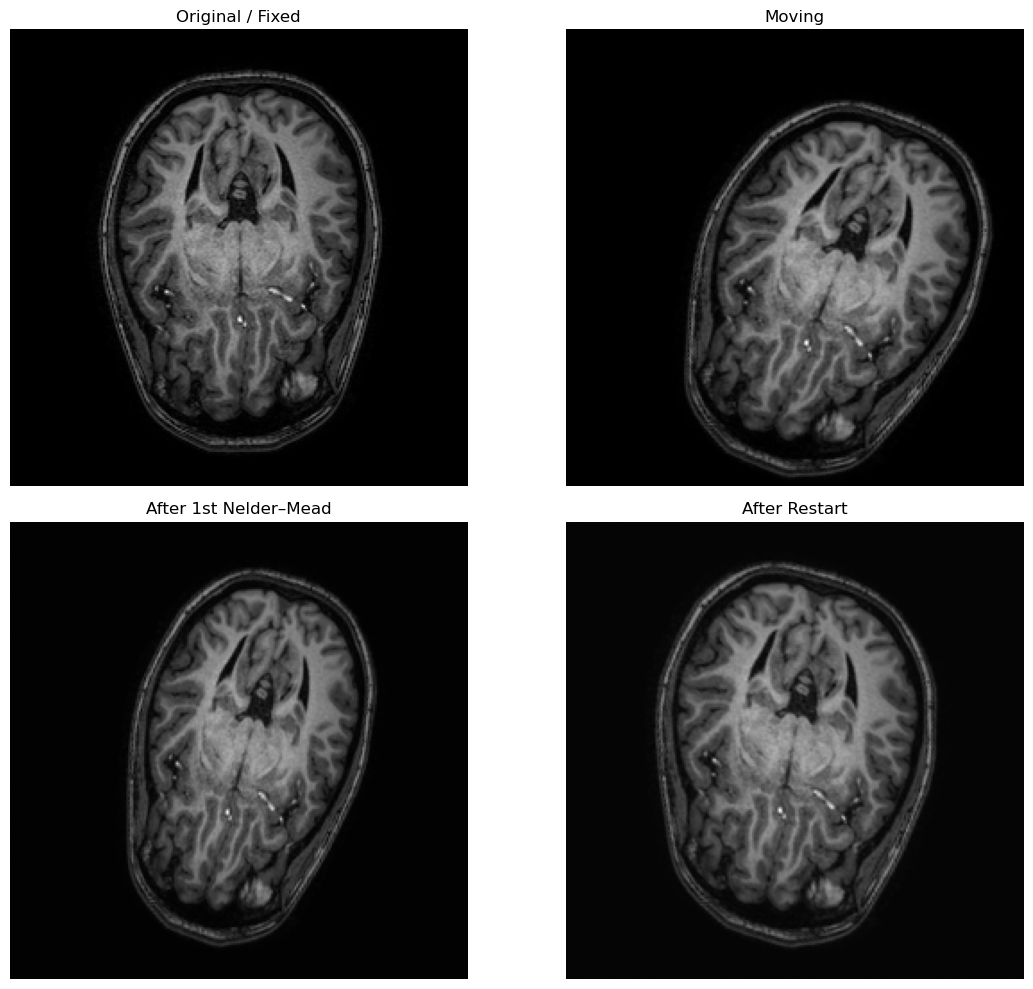

In [33]:
from scipy.optimize import minimize

def objective(p, fixed, moving):
    moved = apply_2d_transform(moving, p)
    return l2_cost(fixed, moved)
fixed = np.array(Image.open("axial.png"))
moving = np.array(Image.open("axial_transformed.png"))
fixed  = fixed.astype(np.float32)
moving = moving.astype(np.float32)
p0 = np.array([1, 0, 0, 1, 0, 0], dtype=float)
res1 = minimize( objective, p0, args=(fixed, moving), method='Nelder-Mead')
p1 = res1.x
res2 = minimize(objective, p1, args=(fixed, moving), method='Nelder-Mead')
p2 = res2.x
moved_after_1 = apply_2d_transform(moving, p1)
moved_after_2 = apply_2d_transform(moving, p2)

l2_1 = l2_cost(fixed, moved_after_1)
l2_2  = l2_cost(fixed, moved_after_2)
print("L2 after 1st run:", l2_1)
print("L2 after restart:", l2_2)
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.imshow(fixed, cmap='gray')
plt.title("Original / Fixed")
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(moving, cmap='gray')
plt.title("Moving")
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(moved_after_1, cmap='gray')
plt.title("After 1st Nelder–Mead")
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(moved_after_2, cmap='gray')
plt.title("After Restart")
plt.axis('off')
plt.tight_layout()
plt.show()


### d)

In scipy implementation the initial simplex is defined like:

```python
for k in range(N):
    y = np.array(x0, copy=True)
    if y[k] != 0:
        y[k] = (1 + nonzdelt) * y[k]
    else:
        y[k] = zdelt
    sim[k + 1] = y
```

with:  
nonzdelt = 0.05  
zdelt    = 0.00025

Given our initial guess, the default simplex would become:

```text
[
  [1.00,      0,          0,          1.00,      0,          0         ],  # p0
  [1.05,      0,          0,          1.00,      0,          0         ],  # a = 1 -> 1.05
  [1.00,      0.00025,    0,          1.00,      0,          0         ],  # b = 0 -> 0.00025
  [1.00,      0,          0.00025,    1.00,      0,          0         ],  # c = 0 -> 0.00025
  [1.00,      0,          0,          1.05,      0,          0         ],  # d = 1 -> 1.05
  [1.00,      0,          0,          1.00,      0.00025,    0         ],  # tx = 0 -> 0.00025
  [1.00,      0,          0,          1.00,      0,          0.00025   ]   # ty = 0 -> 0.00025
]
```

This doesn't make much sense in our case because there are very small perturbations happening with respect to the scales of our image.

So we decided to try by making 10 pixel translation moves and slightly lower scale/rotation and a higher shear.

```text
[
  [1.00,   0.00,   0.00,   1.00,    0.0,   0.0],   # p0
  [1.01,   0.00,   0.00,   1.00,    0.0,   0.0],   # slight scale/rotation in 'a'
  [1.00,   0.01,   0.00,   1.00,    0.0,   0.0],   # slight shear/rotation in 'b'
  [1.00,   0.00,   0.01,   1.00,    0.0,   0.0],   # slight shear/rotation in 'c'
  [1.00,   0.00,   0.00,   1.01,    0.0,   0.0],   # slight scale/rotation in 'd'
  [1.00,   0.00,   0.00,   1.00,   10.0,   0.0],   # 10 px translation in x
  [1.00,   0.00,   0.00,   1.00,    0.0,  10.0]    # 10 px translation in y
]
```

In [34]:
initial_simplex = np.array([
    [1.00, 0.00, 0.00, 1.00, 0.0, 0.0],   # identity
    [1.01, 0.00, 0.00, 1.00, 0.0, 0.0],   # a perturb
    [1.00, 0.01, 0.00, 1.00, 0.0, 0.0],   # b perturb
    [1.00, 0.00, 0.01, 1.00, 0.0, 0.0],   # c perturb
    [1.00, 0.00, 0.00, 1.01, 0.0, 0.0],   # d perturb
    [1.00, 0.00, 0.00, 1.00, 10.0, 0.0],   # tx = 10 px
    [1.00, 0.00, 0.00, 1.00, 0.0, 10.0],   # ty = 10 px
])
res_custom = minimize(objective, p0, args=(fixed, moving), method="Nelder-Mead", options={'initial_simplex': initial_simplex})
p_custom = res_custom.x
moved_custom = apply_2d_transform(moving, p_custom)
l2_default = l2_cost(fixed, moved_after_1)
l2_custom  = l2_cost(fixed, moved_custom)
print("L2 using default Scipy simplex:       ", l2_default)
print("L2 using our own simplex:   ", l2_custom)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(fixed, cmap='gray')
plt.title("Fixed")
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(moving, cmap='gray')
plt.title("Moving")
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(moved_after_1, cmap='gray')
plt.title("Default Scipy Simplex")
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(moved_custom, cmap='gray')
plt.title("Custom Simplex")
plt.axis('off')
plt.tight_layout()
plt.show()



L2 using default Scipy simplex:        761.0087
L2 using our own simplex:    13.231718


# Exercise 4

## a) Rotation matrix in **index** space with pixel spacing $\Delta x, \Delta y$

Let index coordinates be $i,j$ and world coordinates be:
$$x = \Delta x\, i, \qquad y = \Delta y\, j.$$

The world–space rotation matrix is:
$$R_{\text{world}} = \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix}.$$

To derive the index–space rotation matrix, use the scaling matrix
$$S = \begin{pmatrix} \Delta x & 0 \\ 0 & \Delta y \end{pmatrix}.$$

Then:
$$R_{\text{index}} = S^{-1} R_{\text{world}} S,$$

which evaluates to:
$$R_{\text{index}} = \begin{pmatrix}
\cos\theta & - \dfrac{\Delta y}{\Delta x}\sin\theta \\
\dfrac{\Delta x}{\Delta y}\sin\theta & \cos\theta
\end{pmatrix}.$$

**When does the difference matter?**  
Whenever $\Delta x \neq \Delta y$. If pixels are isotropic ($\Delta x = \Delta y$) then the world and index rotation matrices are identical.

---

## b) Rotation around image center

Assume $\Delta x = \Delta y = 1$ and origins coincide. For an image of size $n_x \times n_y$, the center in index coordinates is:
$$c = \begin{pmatrix} (n_x - 1)/2 \\ (n_y - 1)/2 \end{pmatrix}.$$

Rotation around the center is performed via:
$$A = T(c) R T(-c),$$

where
$$R = \begin{pmatrix} \cos\theta & -\sin\theta & 0 \\ \sin\theta & \cos\theta & 0 \\ 0 & 0 & 1 \end{pmatrix}.$$

The resulting affine matrix is:
$$
A(\theta) =
\begin{pmatrix}
\cos\theta & -\sin\theta & (1 - \cos\theta) c_x + \sin\theta\, c_y \\
\sin\theta & \cos\theta & -\sin\theta\, c_x + (1 - \cos\theta) c_y \\
0 & 0 & 1
\end{pmatrix}.
$$

Substitute $c_x = (n_x - 1)/2$, $c_y = (n_y - 1)/2$ for the final form.

$$
A(\theta) =
\begin{pmatrix}
\cos\theta & -\sin\theta & \frac{(1 - \cos\theta)(n_x - 1) + \sin\theta\,(n_y - 1)}{2} \\
\sin\theta & \cos\theta & \frac{-\sin\theta\,(n_x - 1) + (1 - \cos\theta)(n_y - 1)}{2} \\
0 & 0 & 1
\end{pmatrix}.
$$
